In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/abutalha/Documents/Data Analyst/AI Quest/Data Science/insurance_multiple_LR.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
#Encode the categorical variable for further analysis
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import  is_numeric_dtype
le = LabelEncoder()
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue 
    else:
        df[col] = le.fit_transform(df[col])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

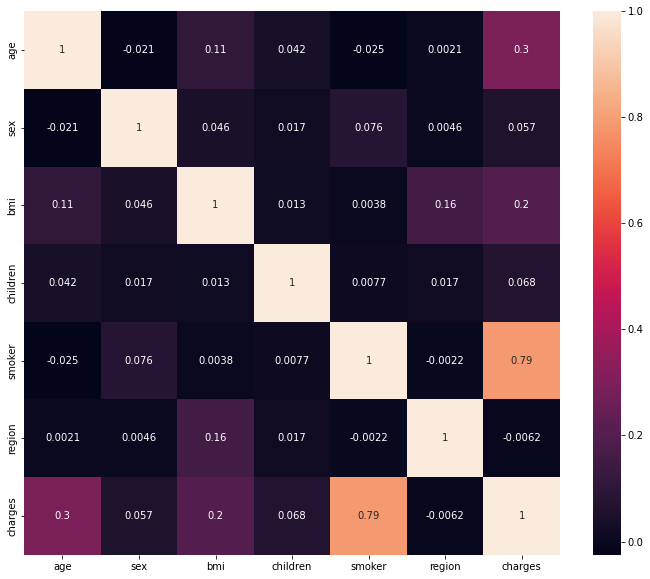

In [9]:
#Check Correlation using Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, data=df) 
# We fond a strong corr with Smoker and average corr with Age and BMI with our targted dependent variable charges.

In [10]:
#Let's select the independent and dependent feature into X and Y

X = df.drop(['charges'], axis=1)
y = df['charges']

In [11]:
#Now split them into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
print(X_train.shape)
print(X_test.shape)

(936, 6)
(402, 6)


In [12]:
#Let's fit the data and create a Linear Regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
print('Coeffecient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coeffecient:  [  256.5772619    -49.39232379   329.02381564   479.08499828
 23400.28378787  -276.31576201]
Intercept:  -11827.733141795678


In [14]:
y_pred = reg.predict(X_test)
#y_test['Predicted'] = reg.predict(X_test)
#y_test.head()

Text(0.5, 1.0, 'Actual Vs Predicted')

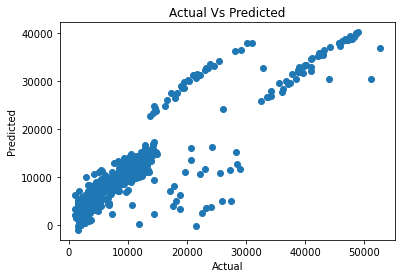

In [15]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Actual Vs Predicted')

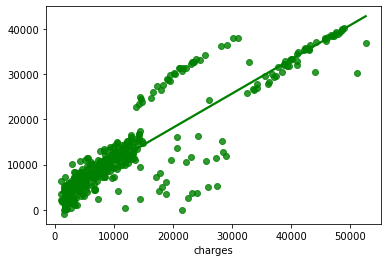

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
578,9724.53000,11051.549098,-1327.019098
610,8547.69130,9821.281107,-1273.589807
569,45702.02235,37867.572209,7834.450141
1034,12950.07120,16125.705792,-3175.634592
198,9644.25250,6920.271325,2723.981175
...,...,...,...
1261,3277.16100,7163.959140,-3886.798140
494,17942.10600,26454.585591,-8512.479591
97,10226.28420,14277.024077,-4050.739877
418,14418.28040,17354.845390,-2936.564990


In [18]:
#check Scores
from sklearn.metrics import r2_score

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
r2_score = r2_score(y_test, y_pred)

print('Training Data Score: ', train_score)
print('Testing Data Score: ', test_score)
print('R2 Squared Score: ',r2_score)

Training Data Score:  0.7306840408360217
Testing Data Score:  0.7911113876316933
R2 Squared Score:  0.7911113876316933


TypeError: array() takes from 1 to 2 positional arguments but 3 were given

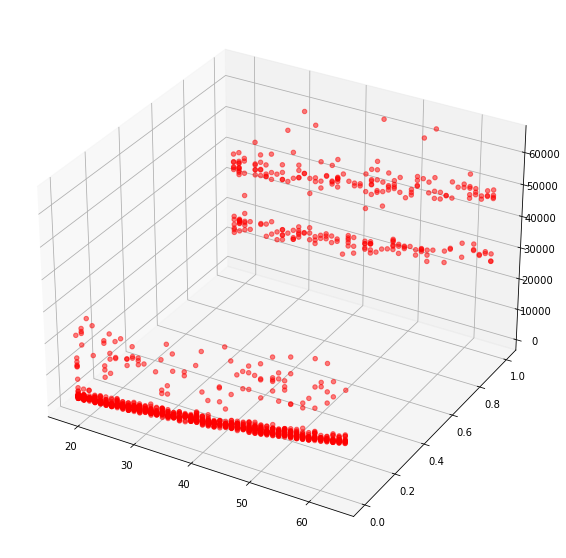

In [19]:
# 3D Visualize the Data for Multiple Linear Regression
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df[['smoker']],df['charges'],c='red', marker='o', alpha=0.5)
ax.plot_surface(np.array(X_test,y_test,y_pred, color='b', alpha=0.3))
ax.set_xlabel('Age')
ax.set_ylabel('Charges')
ax.set_zlabel('Smoker')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import  is_numeric_dtype
le = LabelEncoder()
for col in df1.columns:
    if is_numeric_dtype(df1[col]):
        continue 
    else:
        df1[col] = le.fit_transform(df1[col])
#df1.head()

In [ ]:
a = df1.drop('charges', axis=1)
b = df1['charges']

In [ ]:
#Let's explore Gradient Decent with the dataset
# We will pick 1 independent and 1 dependent feature to play for GD
dataset = df1[['age', 'charges']].copy()
x_label = dataset['age']
y_label = dataset['charges']

In [ ]:
m = 0
c = 0

l = 0.00001

n = len(x_label)

iter = 1000

for i in range(iter):
    predy = m*x_label + c
    Dm = (-2/n) * sum(x_label*(y_label - predy))
    Dc = (-2/n) * sum(y_label - predy)
    
    m = m - 1*Dm
    c = c - 1*Dc
    
    #print(m,c)